In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [44]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [45]:
# reflect an existing database into a new model
# (reflect tables into classes)
Base = automap_base()
Base.prepare(autoload_with=engine)

In [46]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
ms = Base.classes.measurement
st = Base.classes.station

In [48]:
# Create session (link) from python to the db
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Get the table names using `inspect()`.
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# earliest date in the data set
session.query(ms.date).order_by(ms.date).first()

('2010-01-01',)

In [12]:
# most recent date in data set
session.query(ms.date).order_by(ms.date.desc()).first()

('2017-08-23',)

In [31]:
engine.execute(text('SELECT prcp FROM measurement LIMIT 5')).fetchall()

[(0.08,), (0.0,), (0.0,), (0.0,), (None,)]

In [20]:
# Using this date, query the previous 12 months of precipitation data
data = session.query(ms.date, ms.prcp).\
    filter(ms.date > '2016-08-22').\
    order_by(ms.date).all()

In [21]:
# put results into df
prcp_df = pd.DataFrame(data)
prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [22]:
# Sort by date
prcp_df = prcp_df.sort_values(by='date')
prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


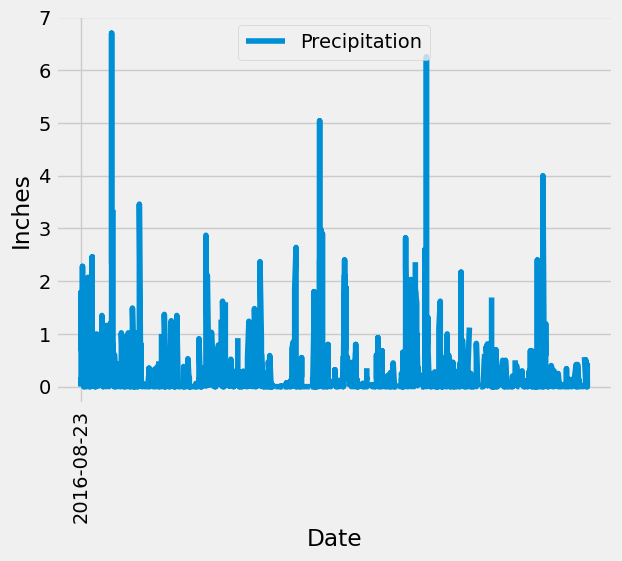

In [38]:

plt.plot(prcp_df['date'], prcp_df['prcp'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper center')

# Set x-axis tick positions and labels for 5 equally spaced values
tick_positions = np.linspace(0, len(prcp_df['date']) - 1, 5)
tick_labels = prcp_df['date'].iloc[tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=90) 
# Adjust locator_params to ensure only 5 ticks are shown
plt.locator_params(axis='x', nbins=5)

Text(0, 0.5, 'Inches')

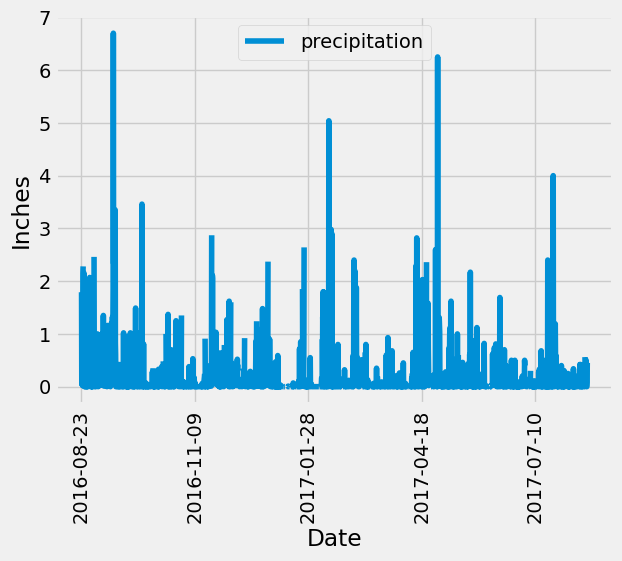

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(ms.date).order_by(ms.date.desc()).first()

# Calculate the date one year from the last date in data set.
dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(ms.date, ms.prcp).\
    filter(ms.date > '2016-08-22').\
    order_by(ms.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(data)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data


In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# query to count the number of stations
session.query(st.station).count()

9

In [40]:
# show all station data
engine.execute(text('SELECT * FROM station LIMIT 10')).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(ms.station, func.count(ms.date)).\
    group_by(ms.station).\
    order_by(func.count(ms.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# total of all datapoints matches sum for 9 stations
session.query(ms.station, func.count(ms.date)).all()

[('USC00519397', 19550)]

In [58]:
engine.execute(text("SELECT * FROM measurement WHERE station='USC00519281' LIMIT 10")).fetchall()

[(12188, 'USC00519281', '2010-01-01', 0.15, 70.0),
 (12189, 'USC00519281', '2010-01-02', 0.0, 62.0),
 (12190, 'USC00519281', '2010-01-03', 0.0, 74.0),
 (12191, 'USC00519281', '2010-01-04', 0.0, 75.0),
 (12192, 'USC00519281', '2010-01-05', 0.0, 74.0),
 (12193, 'USC00519281', '2010-01-06', 0.01, 76.0),
 (12194, 'USC00519281', '2010-01-07', 0.17, 69.0),
 (12195, 'USC00519281', '2010-01-08', 0.0, 66.0),
 (12196, 'USC00519281', '2010-01-09', 0.0, 70.0),
 (12197, 'USC00519281', '2010-01-10', 0.0, 75.0)]

In [55]:
# get all measurements from most active station
data = engine.execute(text("SELECT * FROM measurement WHERE station='USC00519281' ")).fetchall()

In [56]:
active = pd.DataFrame(data)
active

,id,station,date,prcp,tobs
0,12188,USC00519281,2010-01-01,0.15,70.0
1,12189,USC00519281,2010-01-02,0.00,62.0
2,12190,USC00519281,2010-01-03,0.00,74.0
3,12191,USC00519281,2010-01-04,0.00,75.0
4,12192,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...,...
2767,14955,USC00519281,2017-08-14,0.00,77.0
2768,14956,USC00519281,2017-08-15,0.32,77.0
2769,14957,USC00519281,2017-08-16,0.12,76.0
2770,14958,USC00519281,2017-08-17,0.01,76.0


In [59]:
active['tobs'].describe()

count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tmin = session.query(ms.tobs, func.min(ms.tobs)).\
    filter(ms.station == 'USC00519281').all()

tmax = session.query(ms.tobs, func.max(ms.tobs)).\
    filter(ms.station == 'USC00519281').all()

tavg = session.query(ms.tobs, func.avg(ms.tobs)).\
    filter(ms.station == 'USC00519281').all()

print(tmin)
print(tmax)
print(tavg)

[(54.0, 54.0)]
[(85.0, 85.0)]
[(70.0, 71.66378066378067)]


In [66]:
# Using the most active station id # USC00519281
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

data2 = session.query(ms.date, ms.tobs).\
    filter(ms.date > '2016-08-22').\
    filter(ms.station == 'USC00519281').\
    order_by(ms.date).all()

rain = pd.DataFrame(data2)
rain

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


Text(0, 0.5, 'Frequency')

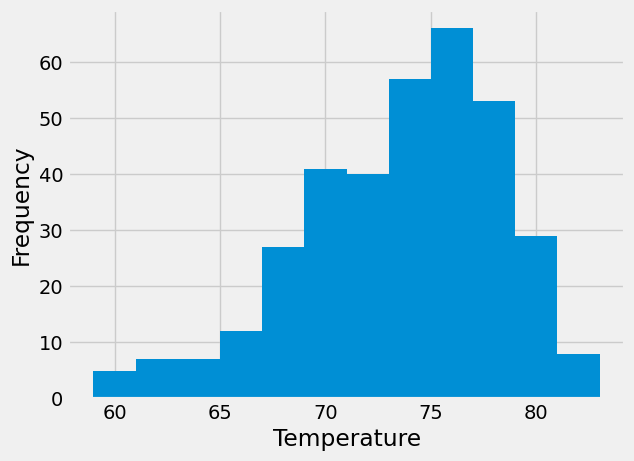

In [74]:
# plot the results as a histogram
plt.hist(rain['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [73]:
# Close Session
session.close()